In [1]:
# import the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



from ipywidgets import interact
import pickle

In [2]:
df = pd.read_csv('data.csv')

In [3]:
print('Shape of Dataset : ', df.shape)

Shape of Dataset :  (2200, 8)


In [4]:
df.head()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.describe()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
df['label'].value_counts()

kidneybeans    100
cotton         100
jute           100
maize          100
mothbeans      100
mungbean       100
apple          100
grapes         100
pigeonpeas     100
muskmelon      100
pomegranate    100
papaya         100
lentil         100
orange         100
mango          100
blackgram      100
watermelon     100
coconut        100
rice           100
coffee         100
banana         100
chickpea       100
Name: label, dtype: int64

In [9]:
print("Average ratio of Nitrogen in the soil : {0: .2f}".format(df['Nitrogen'].mean()))
print("Average ratio of Phosphorus in the soil : {0: .2f}".format(df['Phosphorus'].mean()))
print("Average ratio of Potassium in the soil : {0: .2f}".format(df['Potassium'].mean()))
print("Average Temperature in Celsius : {0: .2f}".format(df['temperature'].mean()))
print("Average relative Humidity in % : {0: .2f}".format(df['humidity'].mean()))
print("Average PH value of the soil : {0: .2f}".format(df['ph'].mean()))
print("Average Rainfall in mm : {0: .2f}".format(df['rainfall'].mean()))

Average ratio of Nitrogen in the soil :  50.55
Average ratio of Phosphorus in the soil :  53.36
Average ratio of Potassium in the soil :  48.15
Average Temperature in Celsius :  25.62
Average relative Humidity in % :  71.48
Average PH value of the soil :  6.47
Average Rainfall in mm :  103.46


In [10]:
@interact
def summary(crops = list(df['label'].value_counts().index)):
    x = df[df['label'] == crops]
    print("--------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrogen required :", x['Nitrogen'].min())
    print("Average Nitrogen required :", x['Nitrogen'].mean())
    print("Maximum Nitrogen required :", x['Nitrogen'].max())

    print("--------------------------------------")
    print("Statistics for Phosphorus")
    print("Minimum Phosphorus required :", x['Phosphorus'].min())
    print("Average Phosphorus required :", x['Phosphorus'].mean())
    print("Maximum Phosphorus required :", x['Phosphorus'].max())
    
    print("--------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required :", x['Potassium'].min())
    print("Average Potassium required :", x['Potassium'].mean())
    print("Maximum Potassium required :", x['Potassium'].max())
    
    print("--------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required :", x['temperature'].min())
    print("Average Temperature required :", x['temperature'].mean())
    print("Maximum Temperature required :", x['temperature'].max())
    
    print("--------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required :", x['humidity'].min())
    print("Average Humidity required :", x['humidity'].mean())
    print("Maximum Humidity required :", x['humidity'].max())
    
    print("--------------------------------------")
    print("Statistics for PH value")
    print("Minimum PH value required :", x['ph'].min())
    print("Average PH value required :", x['ph'].mean())
    print("Maximum PH value required :", x['ph'].max())
    
    print("--------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required :", x['rainfall'].min())
    print("Average Rainfall required :", x['rainfall'].mean())
    print("Maximum Rainfall required :", x['rainfall'].max())

interactive(children=(Dropdown(description='crops', options=('kidneybeans', 'cotton', 'jute', 'maize', 'mothbe…

In [11]:
@interact
def compare(conditions = ['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'ph', 'humidity', 'rainfall']):
    print("Average value for", conditions, "is {0: .2f}".format(df[conditions].mean()))
    print("--------------------------------------")
    print("Rice : {0: .2f}".format(df[(df['label'] == 'rice')][conditions].mean()))
    print("Black Grams : {0: .2f}".format(df[(df['label'] == 'blackgram')][conditions].mean()))
    print("Banana : {0: .2f}".format(df[(df['label'] == 'banana')][conditions].mean()))
    print("Jute : {0: .2f}".format(df[(df['label'] == 'jute')][conditions].mean()))
    print("Coconut : {0: .2f}".format(df[(df['label'] == 'coconut')][conditions].mean())) 
    print("Apple : {0: .2f}".format(df[(df['label'] == 'apple')][conditions].mean()))
    print("Rice : {0: .2f}".format(df[(df['label'] == 'papaya')][conditions].mean()))
    print("Muskmelon : {0: .2f}".format(df[(df['label'] == 'muskmelon')][conditions].mean()))
    print("Grapes : {0: .2f}".format(df[(df['label'] == 'grapes')][conditions].mean()))    
    print("Watermelon : {0: .2f}".format(df[(df['label'] == 'watermelon')][conditions].mean()))
    print("Kidney Beans : {0: .2f}".format(df[(df['label'] == 'kidneybeans')][conditions].mean()))
    print("Mung Bean : {0: .2f}".format(df[(df['label'] == 'mungbean')][conditions].mean()))    
    print("Orange : {0: .2f}".format(df[(df['label'] == 'orange')][conditions].mean()))    
    print("Chick Peas : {0: .2f}".format(df[(df['label'] == 'chickpea')][conditions].mean()))    
    print("Lentil : {0: .2f}".format(df[(df['label'] == 'lentil')][conditions].mean()))
    print("Cotton : {0: .2f}".format(df[(df['label'] == 'cotton')][conditions].mean()))
    print("Maize : {0: .2f}".format(df[(df['label'] == 'maize')][conditions].mean()))
    print("Moth Beans : {0: .2f}".format(df[(df['label'] == 'mothbeans')][conditions].mean()))
    print("Pigeon Peas : {0: .2f}".format(df[(df['label'] == 'pigeonpeas')][conditions].mean()))
    print("Mango : {0: .2f}".format(df[(df['label'] == 'mango')][conditions].mean()))
    print("Pomegranate : {0: .2f}".format(df[(df['label'] == 'pomegranate')][conditions].mean()))
    print("Coffee : {0: .2f}".format(df[(df['label'] == 'coffee')][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('Nitrogen', 'Phosphorus', 'Potassium', 'temp…

In [12]:
@interact
def compare(conditions = ['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'ph', 'humidity', 'rainfall']):
    print("Crops which require greater than average", conditions, '\n')
    print(df[df[conditions] > df[conditions].mean()]['label'].unique())
    print("--------------------------------------")
    print("Crops which require less than average", conditions, '\n')
    print(df[df[conditions] <= df[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('Nitrogen', 'Phosphorus', 'Potassium', 'temp…

C:\Users\Chacha Tech\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Chacha Tech\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Chacha Tech\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

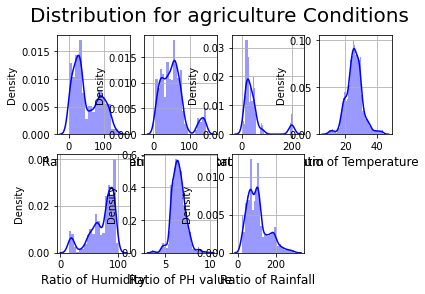

In [13]:
plt.subplot(2,4,1)
sns.distplot(df['Nitrogen'], color='blue')
plt.xlabel('Ratio of Nitrogen', fontsize = 12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(df['Phosphorus'], color='blue')
plt.xlabel('Ratio of Phosphorus', fontsize = 12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(df['Potassium'], color='blue')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(df['temperature'], color='blue')
plt.xlabel('Ratio of Temperature', fontsize = 12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(df['humidity'], color='blue')
plt.xlabel('Ratio of Humidity', fontsize = 12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(df['ph'], color='blue')
plt.xlabel('Ratio of PH value', fontsize = 12)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(df['rainfall'], color='blue')
plt.xlabel('Ratio of Rainfall', fontsize = 12)
plt.grid()

plt.suptitle('Distribution for agriculture Conditions', fontsize = 20)
plt.show()

In [14]:
print("Some interesting patterns")
print("--------------------------------------")
print("Crops which requires very high Ratio of Nitrogen content in soil :", df[df['Nitrogen'] > 120]['label'].unique())
print("Crops which requires very high Ratio of Phosphorus content in soil :", df[df['Phosphorus'] > 100]['label'].unique())
print("Crops which requires very high Ratio of Potassium content in soil :", df[df['Potassium'] > 200]['label'].unique())
print("Crops which requires very high Ratio of Rainfall content in soil :", df[df['rainfall'] > 200]['label'].unique())
print("Crops which requires very low Ratio of  Temperature content in soil :", df[df['temperature'] < 10]['label'].unique())
print("Crops which requires very high Ratio of Temperature content in soil :", df[df['temperature'] > 40]['label'].unique())
print("Crops which requires very high Ratio of Humidity content in soil :", df[df['humidity'] < 20]['label'].unique())
print("Crops which requires very low Ratio of PH content in soil :", df[df['ph'] < 4]['label'].unique())
print("Crops which requires very high Ratio of PH content in soil :", df[df['ph'] > 9]['label'].unique())

Some interesting patterns
--------------------------------------
Crops which requires very high Ratio of Nitrogen content in soil : ['cotton']
Crops which requires very high Ratio of Phosphorus content in soil : ['grapes' 'apple']
Crops which requires very high Ratio of Potassium content in soil : ['grapes' 'apple']
Crops which requires very high Ratio of Rainfall content in soil : ['rice' 'papaya' 'coconut']
Crops which requires very low Ratio of  Temperature content in soil : ['grapes']
Crops which requires very high Ratio of Temperature content in soil : ['grapes' 'papaya']
Crops which requires very high Ratio of Humidity content in soil : ['chickpea' 'kidneybeans']
Crops which requires very low Ratio of PH content in soil : ['mothbeans']
Crops which requires very high Ratio of PH content in soil : ['mothbeans']


In [15]:
print("Summer Crops")
print(df[(df['temperature'] > 30) & (df['humidity'] > 50)]['label'].unique())
print("--------------------------------------")
print("Winter Crops")
print(df[(df['temperature'] < 20) & (df['humidity'] > 30)]['label'].unique())
print("--------------------------------------")
print("Rainy Crops")
print(df[(df['rainfall'] > 200) & (df['humidity'] > 30)]['label'].unique())
print("--------------------------------------")

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
--------------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
--------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']
--------------------------------------


In [16]:
from sklearn.cluster import KMeans

x_c = df.drop(['label'], axis = 1)

x_c = x_c.values

print(x_c.shape)

(2200, 7)


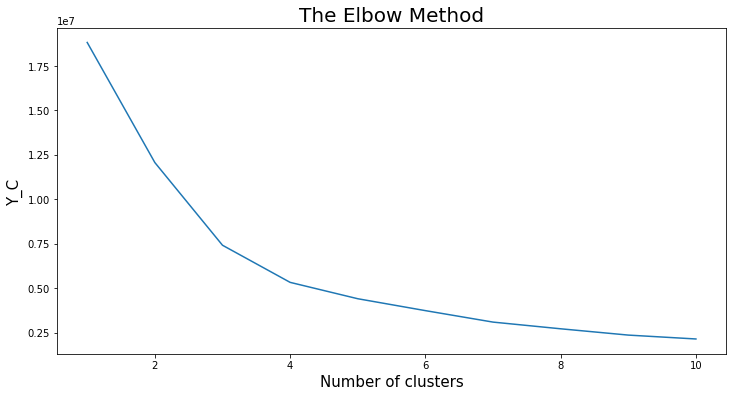

In [17]:
plt.rcParams['figure.figsize'] = (12, 6)

y_c = []
for i in range(1, 11):
    kmc = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmc.fit(x_c)
    y_c.append(kmc.inertia_)

plt.plot(range(1, 11), y_c)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('Y_C', fontsize = 15)
plt.show()

In [18]:
kmc = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = kmc.fit_predict(x_c)

a = df['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0 : 'cluster'})

In [19]:
print("Lets check the result after applying the K-Means Clustering Analysis \n")
print("Crops in First Cluster :", z[z['cluster'] == 0]['label'].unique())
print("--------------------------------------")
print("Crops in Second Cluster :", z[z['cluster'] == 1]['label'].unique())
print("--------------------------------------")
print("Crops in Third Cluster :", z[z['cluster'] == 2]['label'].unique())
print("--------------------------------------")
print("Crops in Fourth Cluster :", z[z['cluster'] == 3]['label'].unique())
print("--------------------------------------")

Lets check the result after applying the K-Means Clustering Analysis 

Crops in First Cluster : ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
--------------------------------------
Crops in Second Cluster : ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
--------------------------------------
Crops in Third Cluster : ['grapes' 'apple']
--------------------------------------
Crops in Fourth Cluster : ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
--------------------------------------


In [20]:
X = df.drop(['label'], axis = 1)
y = df['label']

print("Shape of X :", X.shape)
print("Shape of y :", y.shape)

Shape of X : (2200, 7)
Shape of y : (2200,)


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print("The Shape of X Train :", X_train.shape)
print("The Shape of X Test :", X_test.shape)
print("The Shape of y Train :", y_train.shape)
print("The Shape of y Test :", X_test.shape)

The Shape of X Train : (1760, 7)
The Shape of X Test : (440, 7)
The Shape of y Train : (1760,)
The Shape of y Test : (440, 7)


In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred[:5]

C:\Users\Chacha Tech\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['watermelon', 'watermelon', 'grapes', 'chickpea', 'blackgram'],
      dtype=object)

In [24]:
filename = 'agriculture_model.pkl'
pickle.dump(model, open(filename, 'wb'))

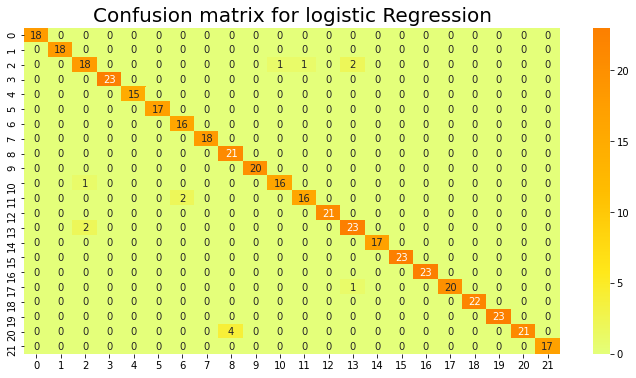

In [25]:
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (12, 6)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title("Confusion matrix for logistic Regression", fontsize = 20)
plt.show()

In [26]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [27]:
df.head()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [28]:
prediction_manually = model.predict((np.array([[90,
                                                40,
                                                40,
                                                20,
                                                80,
                                                 7,
                                               280,]])))
print("The Suggested crop for given climatic condition is :", prediction_manually)

The Suggested crop for given climatic condition is : ['rice']


In [29]:
model = pickle.load(open('agriculture_model.pkl','rb'))

In [30]:
print(model.predict([[107, 34, 32, 26, 66, 6.7, 177]]))

['coffee']


In [31]:
df.tail()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee
